Geocodificando la ciudad de Popayán...
Geocodificación exitosa.
Mostrando el polígono geocodificado...
Cargando el grafo de la red de calles de Popayán...
Grafo cargado exitosamente.

Análisis de la red de calles de Popayán:
Número de intersecciones (nodos):  7438
Número de segmentos de carretera (aristas): 20552


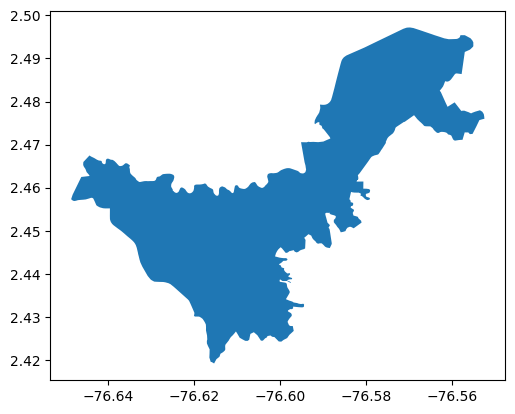

In [46]:
# Importing osmnx
import osmnx as ox

# Configurar Matplotlib para visualización si es necesario
# import matplotlib.pyplot as plt

# Definir el polígono para la ciudad de Popayán, Cauca, Colombia
# Es importante ser específico para que OSMnx identifique correctamente el área.
# Puedes probar con diferentes niveles de especificidad si la primera no funciona,
# por ejemplo: 'Popayán, Colombia' o 'Popayán'.
# 'Perímetro urbano de Popayán, Cauca, Colombia' es un buen punto de partida.
print("Geocodificando la ciudad de Popayán...")
try:
    admin_district = ox.geocode_to_gdf('Perímetro urbano de Popayán, Cauca, Colombia')
    print("Geocodificación exitosa.")
except Exception as e:
    print(f"Error al geocodificar Popayán: {e}")
    print("Asegúrate de que la cadena de ubicación sea correcta y haya conexión a internet.")
    # Puedes probar con una cadena menos específica si da error, como 'Popayán, Colombia' o 'Popayán'
    admin_district = ox.geocode_to_gdf('Popayán, Colombia') # Intento alternativo

# Muestra el polígono en un gráfico (opcional, para verificar que es correcto)
print("Mostrando el polígono geocodificado...")
admin_district.plot()
# Si estás en un entorno interactivo como Jupyter, la trama se mostrará automáticamente.
# Si estás en un script .py, puedes añadir plt.show() al final para que la ventana del gráfico aparezca.
# plt.show()

# Extraer la geometría del polígono de la primera fila del GeoDataFrame
# Asumimos que el primer resultado es el correcto para la ciudad de Popayán.
# Puedes inspeccionar admin_district si hay múltiples geometrías.
admin_poly = admin_district.geometry.values[0]

# Guardar imagen del mapa
png_path = os.path.join(output_dir, "map.png")
plt.savefig(png_path, dpi=300, bbox_inches='tight')

# Cargar el grafo de la red de calles dentro de ese polígono
print("Cargando el grafo de la red de calles de Popayán...")
G = ox.graph_from_polygon(admin_poly, network_type='walk')
print("Grafo cargado exitosamente.")

print('\nAnálisis de la red de calles de Popayán:')
print('Número de intersecciones (nodos): ', G.number_of_nodes())
print('Número de segmentos de carretera (aristas):',  G.number_of_edges())

# Opcional: Visualizar el grafo
# print("\nVisualizando el grafo...")
# fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_linewidth=0.5, show=False, close=False)
# plt.title("Red Peatonal de Popayán")
# plt.show()

In [36]:
# Define the walking speed (5 km/h -> 1.39 m/s)
walking_speed = 1.39  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    # Calculate travel time in seconds
    data['travel_time'] = data['length'] / walking_speed

# Pick a center node
center_node = list(G.nodes())[30]  # starting point

# Generate isochrones
isochrone_times = [5, 10, 20, 30]  # isochrones in minutes

C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\2499453853.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\2499453853.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\2499453853.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\2499453853.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = Polygon(gpd.GeoSeries(node_points).unary_union.conve

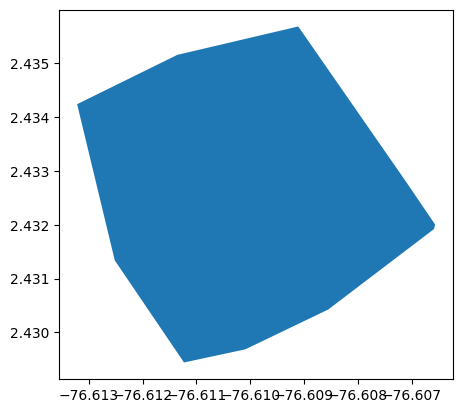

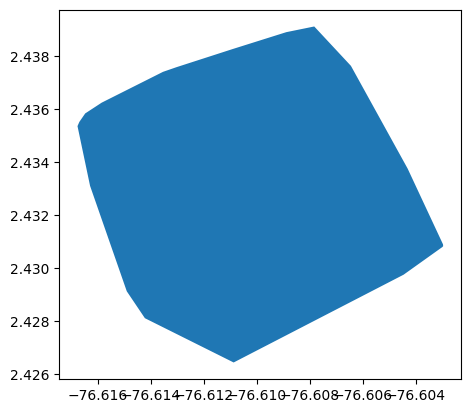

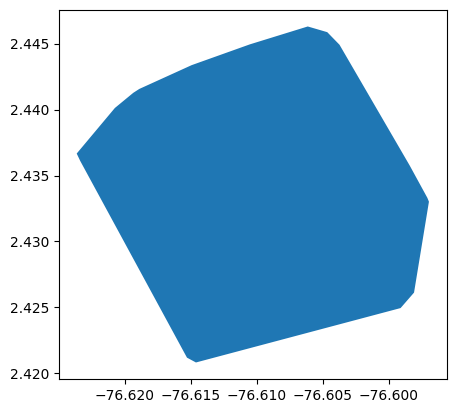

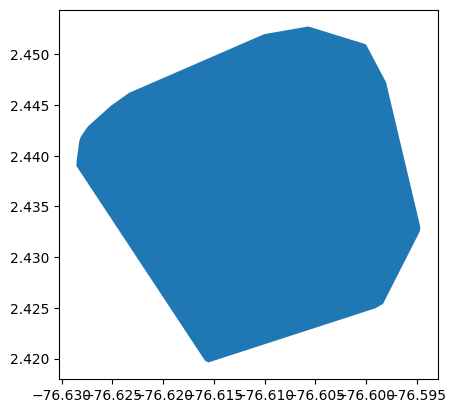

In [37]:
# Library imports
import networkx as nx 
from shapely.geometry import Point, Polygon  
import geopandas as gpd 

isochrone_polys = []

for time in isochrone_times:
    subgraph = nx.ego_graph(G, 
                            center_node, 
                            radius=time*60, 
                            distance='travel_time')

    node_points = [Point((data['x'], data['y'])) 
                   for node, data in subgraph.nodes(data=True)]

    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    gpd.GeoDataFrame([polygon], columns = ['geometry']).plot()
    isochrone_polys.append(gpd.GeoSeries([polygon]))

In [44]:
import os

# Crear carpeta de salida (si no existe)
output_dir = "isochrones_popayan"
os.makedirs(output_dir, exist_ok=True)


C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\1426592867.py:50: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union = nodes_gdf.unary_union
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\1426592867.py:50: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union = nodes_gdf.unary_union
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\1426592867.py:50: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union = nodes_gdf.unary_union
C:\Users\carlos.castillof\AppData\Local\Temp\ipykernel_14680\1426592867.py:50: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union = nodes_gdf.unary_union


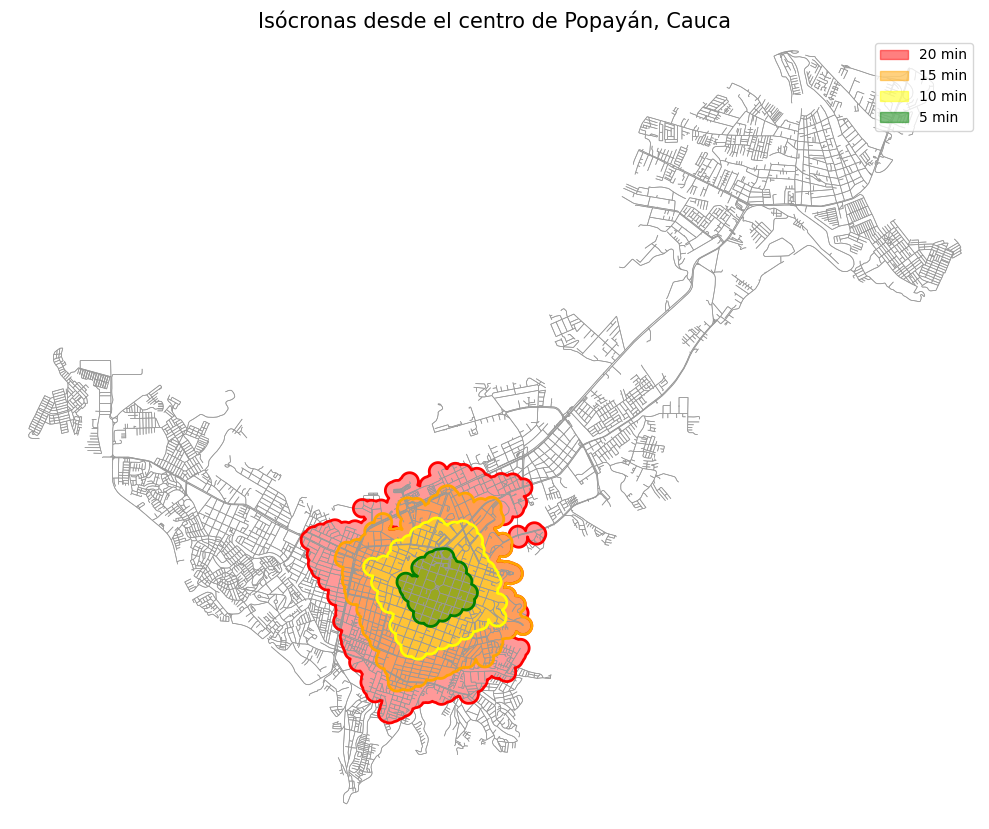

In [45]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import osmnx as ox
import networkx as nx
import geopandas as gpd


ox.settings.use_cache = True
ox.settings.log_console = True

# 1. Obtener geometría de Popayán
admin_district = ox.geocode_to_gdf('Perímetro urbano de Popayán, Cauca, Colombia')
polygon = admin_district.geometry.iloc[0]

# 2. Descargar red caminable
G = ox.graph_from_polygon(polygon, network_type='walk', simplify=True)

# 3. Proyectar grafo a CRS métrico
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, nodes=True, edges=False)

# 4. Nodo de inicio: centroide proyectado

# Coordenadas del punto inicial (WGS84)
lat, lon = 2.441901, -76.606439

# Crear GeoSeries y proyectar al CRS del grafo
point_wgs = gpd.GeoSeries([gpd.points_from_xy([lon], [lat])[0]], crs="EPSG:4326")
point_proj = point_wgs.to_crs(G_proj.graph['crs'])
x, y = point_proj.geometry.iloc[0].x, point_proj.geometry.iloc[0].y

# Obtener el nodo más cercano a esas coordenadas proyectadas
center_node = ox.distance.nearest_nodes(G_proj, X=x, Y=y)



# 5. Definir tiempos y distancias
trip_times = [5, 10, 15, 20]  # minutos
meters_per_minute = 80  # m/min
travel_distances = [t * meters_per_minute for t in trip_times]

# 6. Generar polígonos de isócrona
def make_iso_polys(G, center_node, distances):
    polys = []
    for dist in distances:
        subgraph = nx.ego_graph(G, center_node, radius=dist, distance='length')
        nodes_gdf = ox.graph_to_gdfs(subgraph, nodes=True, edges=False)
        if not nodes_gdf.empty:
            union = nodes_gdf.unary_union
            buffered = gpd.GeoSeries([union]).buffer(100)  # Aumentar buffer para visibilidad
            polys.append(buffered)
        else:
            polys.append(gpd.GeoSeries())
    return polys

isochrone_polys = make_iso_polys(G_proj, center_node, travel_distances)

# 7. Visualización
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['red', 'orange', 'yellow', 'green']

# Dibujar isócronas
for idx, (poly, time) in enumerate(reversed(list(zip(isochrone_polys, trip_times)))):
    if not poly.empty and not poly.is_empty.all():
        poly.plot(ax=ax, color=colors[idx], alpha=0.4)
        poly.boundary.plot(ax=ax, color=colors[idx], linewidth=2)

# Leyenda manual
handles = [
    mpatches.Patch(color=colors[idx], alpha=0.5, label=f'{time} min')
    for idx, time in enumerate(reversed(trip_times))
]

ox.plot_graph(G_proj, ax=ax, node_size=0, edge_linewidth=0.5, show=False)
ax.set_title("Isócronas desde el centro de Popayán, Cauca", fontsize=15)
plt.legend(handles=handles)
plt.tight_layout()

# Guardar imagen del mapa
png_path = os.path.join(output_dir, "isochrones_map.png")
plt.savefig(png_path, dpi=300, bbox_inches='tight')


plt.show()
